# Graded Assignment 2.1: K-means Clustering

- Done by: A Alkaff Ahamed
- Grade: Pending
- 15 April 2025


## Learning Outcome Addressed
- Develop a foundation in Python programming and a thorough understanding of Machine Learning concepts, including supervised, unsupervised and reinforcement learning.

Time to test your skills on the topics covered in this week. We recommend you try going through the [Python documentation](https://www.python.org/about/help/). if you have any issues. You can also discuss your experience with your peers using the Week 2: Q&A Discussion Board. 


## Scenario:
A retail company wants to develop a customer segmentation strategy based on purchasing behavior to create targeted marketing campaigns. Your task is to implement K-Means clustering to identify distinct customer segments and provide actionable business insights.

## Assignment Instructions:

Create a Python notebook to analyse customer data, implement K-Means clustering, and interpret the results for business decision-making. This assignment integrates unsupervised learning concepts with practical business applications.

Here is the dataset for this exercise - customer_data.csv

The customer_data.csv dataset contains information about customers including:

- CustomerID: Unique identifier for each customer
- Age: Customer's age
- Annual Income (k$): Annual income in thousands of dollars
- Spending Score (1-100): Score assigned based on customer spending behavior and purchasing data
- Purchase Frequency: Number of purchases per month
- Avg Purchase Value: Average value of purchases in dollars

## Utilise Libraries/Data Setup

- Import all necessary libraries (pandas, numpy, matplotlib, seaborn, scikit-learn)
- Load the customer dataset and display the first few rows
- Show basic information and statistics about the dataset

## Data Visualisation and Enhancement

- Generate at least three EDA (Exploratory Data Analysis) visualisations:
   - Create scatter plots to visualise relationships between variables
   - Generate a correlation heatmap to understand feature relationships
   - Create distribution plots for all variables
- Check for missing values and outliers:
   - Identify and handle missing data appropriately
   - Detect outliers using box plots and decide whether to remove them
- Scale/normalise features for clustering:
  - Apply standardisation or min-max scaling
- Display the transformed data summary

## Determine the Optimal Number of Clusters

- Implement the Elbow Method:
   - Calculate inertia for different values of k (1-10)
   - Plot the elbow curve and identify the optimal k value
- Apply Silhouette Analysis:
   - Calculate silhouette scores for different values of k
   - Visualise silhouette plots and determine the best k value
- Justify your final choice of k with clear reasoning

## Implement K-means Clustering

- Initialise and train the K-Means model with the optimal k value and assign cluster labels to each customer
- Visualise the clusters using:
   - 2D scatter plots with different feature combinations
   - 3D scatter plot for three key features
- Interpret the characteristics of each cluster

Estimated time: 90-120 minutes

Submission Instructions:

- Select the Start Assignment button at the top right of this page.
- Upload your answers in the form of a Word or PDF file.
- Upload the Python file (.ipynb) you used to complete this assignment.
- Select the Submit Assignment button to submit your responses.

*This is a graded and counts towards programme completion. You may attempt this assignment a maximum of two times.*


## Tasks

Task 1: Correctly import the dataset and show basic information and statistics

Task 2: Generate at least 3 EDA visualisations based on the dataset

Task 3: Check for missing values and outliers

Task 4: Scale or normalise the features for clustering

Task 5: Implement the Elbow Method to determine the optimal number of clusters

Task 6: Apply Silhouette Analysis to find the optimal k value

Task 7: Train the K-means model and visualise the clusters


## Task 1: Correctly import the dataset and show basic information and statistics


In [1]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inline in Jupyter Notebooks
%matplotlib inline


In [2]:
# Read Data and Display first 5 Rows

df = pd.read_csv("customer_data.csv")
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
0,1,56,84,71.905329,5.9,106.071893
1,2,69,86,38.482533,6.0,62.755253
2,3,46,41,38.967487,7.5,29.958887
3,4,32,23,10.002036,1.7,67.007220
4,5,60,76,56.350309,2.9,72.704110


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Purchase Frequency      200 non-null    float64
 5   Avg Purchase Value      200 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,43.42500,67.145000,50.869302,5.335500,43.092021
std,57.879185,14.94191,31.249587,22.563855,2.687808,29.326249
min,1.000000,18.00000,15.000000,1.000000,0.600000,10.000000
25%,50.750000,31.00000,41.000000,32.366332,3.000000,17.651673
50%,100.500000,43.50000,66.500000,52.352457,5.450000,36.086311
75%,150.250000,56.00000,95.250000,67.224241,7.600000,59.641832
max,200.000000,69.00000,119.000000,100.000000,10.000000,137.621150


**Analysis:**

- Total there are 200 data points
- Dataset has no `null` values


## Task 2: Generate at least 3 EDA visualisations based on the dataset

1. Distribution plot (Histogram) for all 5 variables
2. Correlation Heatmap
3. Pair Plot
4. Scatter Plot


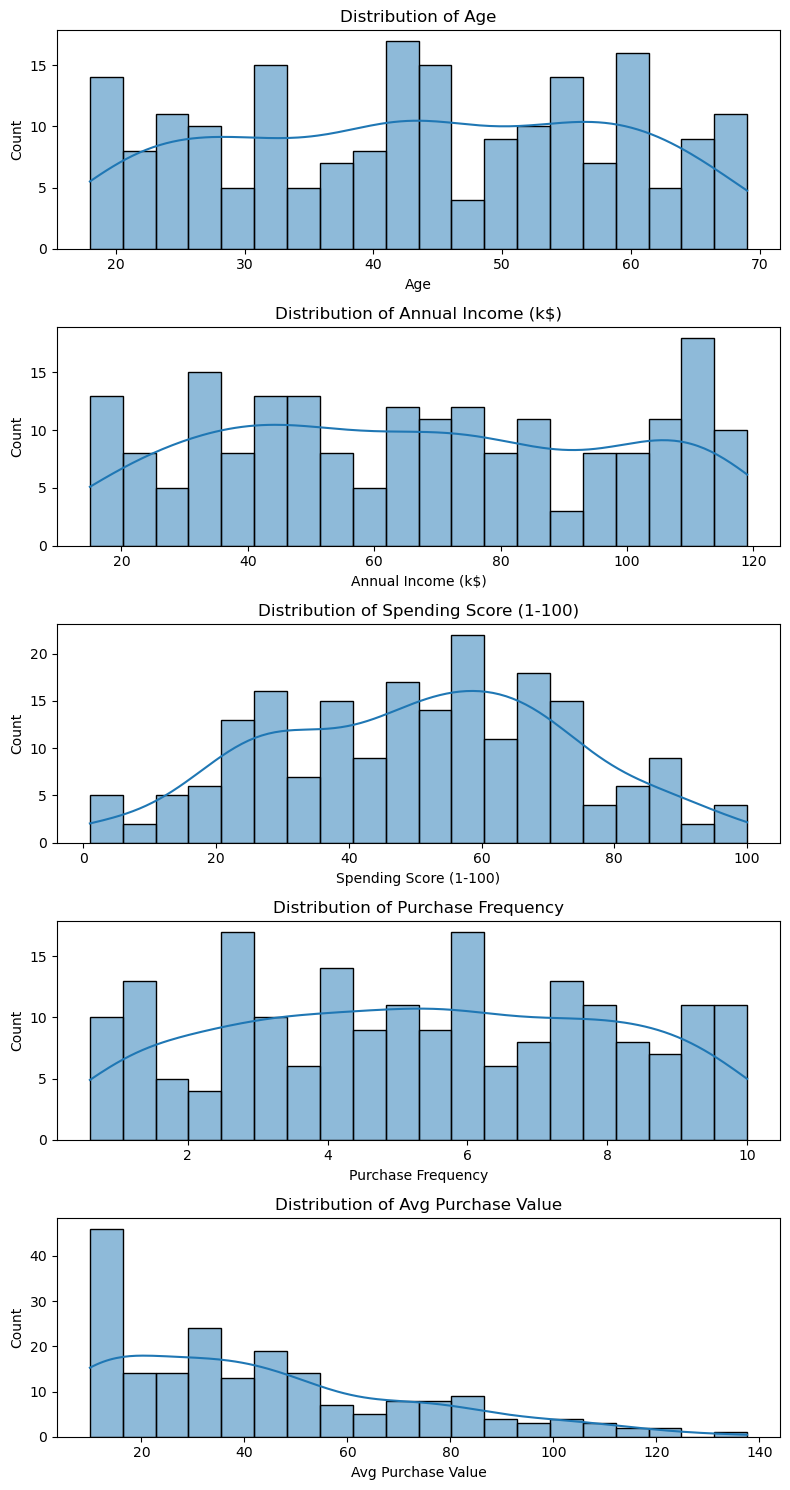

In [5]:
# Histogram
# ---------

plt.figure(figsize=(8, 15))  

# Create individual histograms for each feature in 5 rows and 1 column
for i, column in enumerate(df.columns[1:], 1):  # Skipping CustomerID
    # 5 rows, 1 column, plot index i
    plt.subplot(5, 1, i)
    
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()

plt.savefig("task_2a_distribution_plots.png")
plt.show()

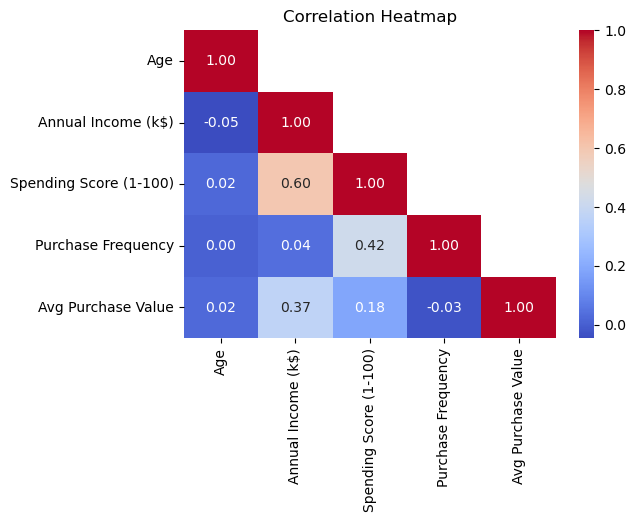

In [6]:
# Correlation Heatmap
# -------------------

# Calculate the correlation matrix
# Exclude 1st column 'CustomerID'
correlation_matrix = df.iloc[:,1:].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            mask=np.triu(correlation_matrix, k=1), # Remove the upper triangle to remove redundancy
            fmt='.2f', 
            cbar=True)

plt.title("Correlation Heatmap")

plt.savefig("task_2b_correlation_heatmap.png")
plt.show()

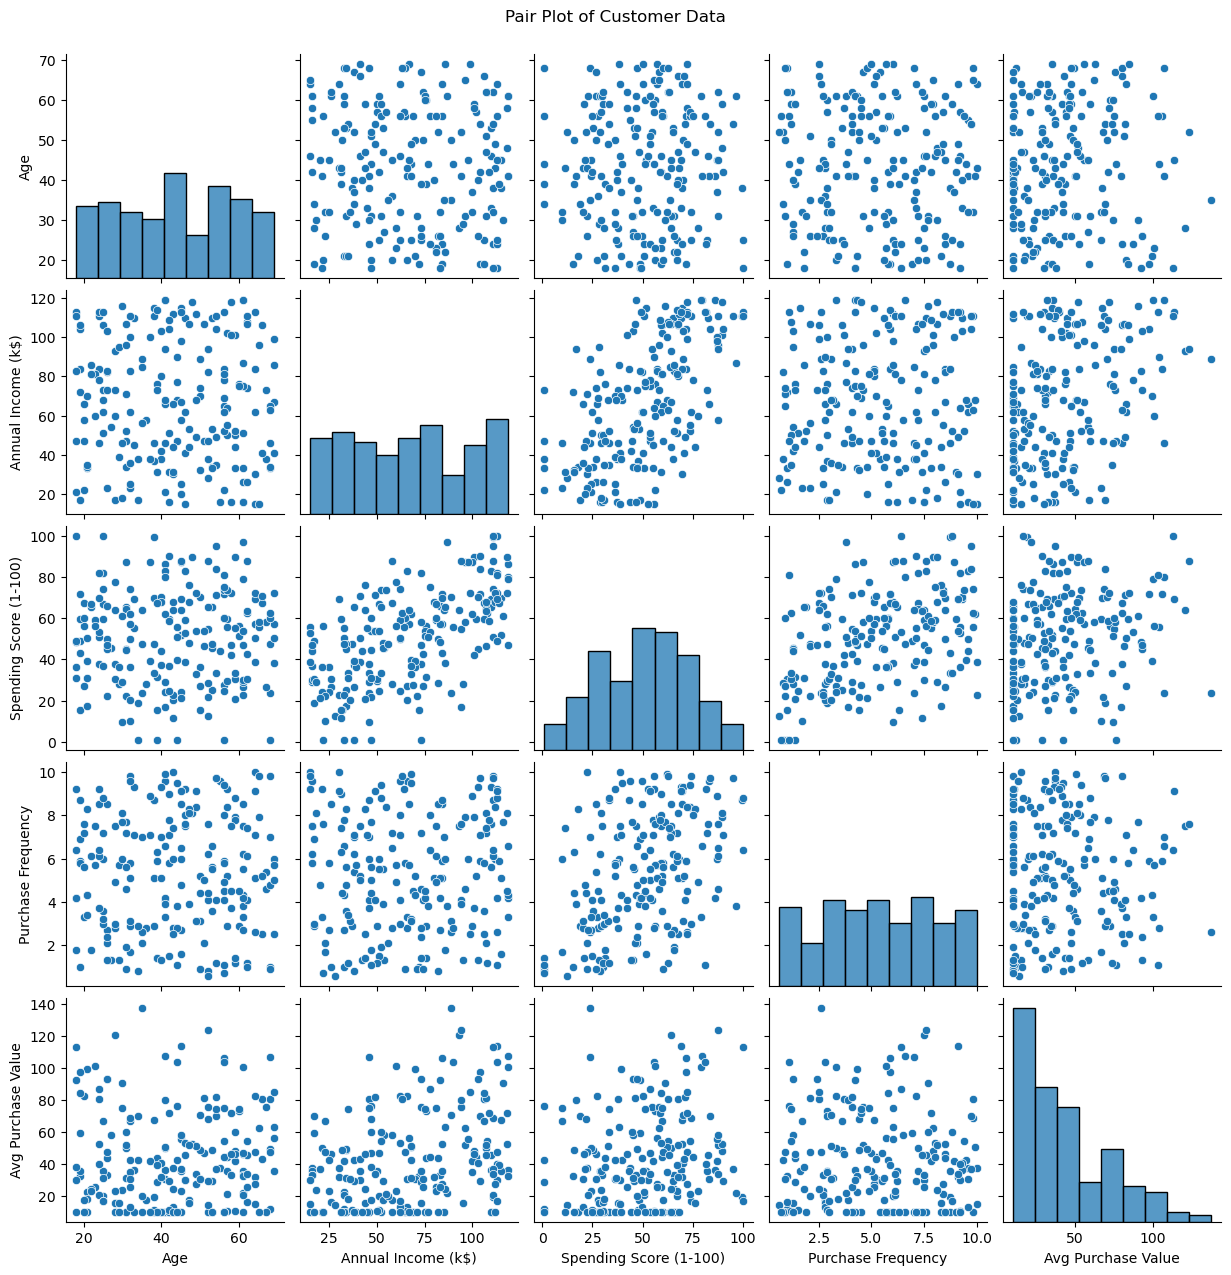

In [7]:
# Pair Plot
# ---------

# Exclude 1st column 'CustomerID'
sns.pairplot(df.loc[:, df.columns[1:]])

plt.suptitle("Pair Plot of Customer Data", y=1.02)

plt.savefig("task_2c_pair_plot_customer_data.png")
plt.show()

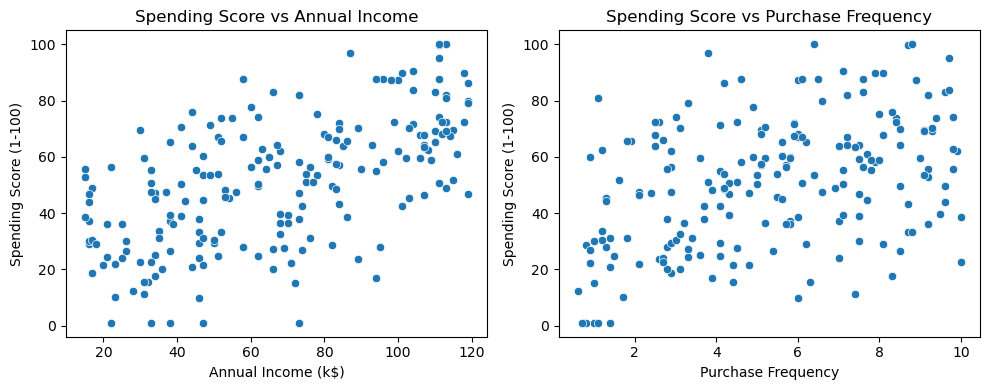

In [8]:
# Scatter Plot
# ------------

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Scatter Plot 1: Spending Score vs Annual Income
sns.scatterplot(data=df, 
                x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                ax=axes[0])

axes[0].set_title("Spending Score vs Annual Income")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1-100)")

# Scatter Plot 2: Spending Score vs Purchase Frequency
sns.scatterplot(data=df, 
                x="Purchase Frequency", 
                y="Spending Score (1-100)", 
                ax=axes[1])

axes[1].set_title("Spending Score vs Purchase Frequency")
axes[1].set_xlabel("Purchase Frequency")
axes[1].set_ylabel("Spending Score (1-100)")


plt.tight_layout()

plt.savefig("task_2d_scatter_plots.png")
plt.show()

## Task 3: Check for missing values and outliers

1. Check for null values
2. Check for outliers using Box Plot


In [9]:
# Check for Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Purchase Frequency      200 non-null    float64
 5   Avg Purchase Value      200 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [10]:
# Check for Null
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Avg Purchase Value        0
dtype: int64

In [11]:
# Check for Zero
(df == 0).sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Avg Purchase Value        0
dtype: int64

`(df == 0).sum()` Performs a check to identify zero values in the DataFrame

`df == 0` creates a Boolean DataFrame where each element is checked against the condition `== 0`. It returns `True` for any element that is zero and `False` for all other values.

`.sum()` treats `True` as `1` and `False` as `0`. 
So, calling `.sum()` will give the count of `True` values (i.e., the number of zeroes) in **each column**.


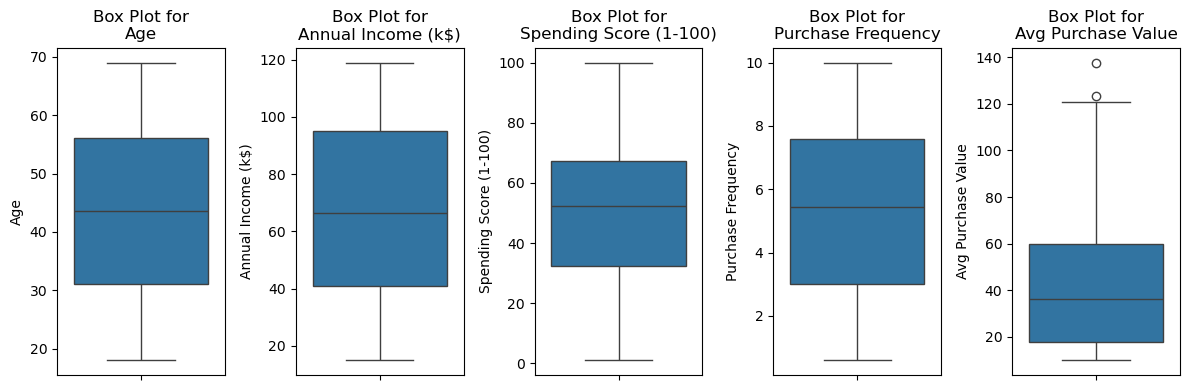

In [12]:
# Box Plots
# ---------

plt.figure(figsize=(12, 4))

# Loop through numerical columns and plot a boxplot for each
# Exclude 1st Column 'CustomerID'
for i, col in enumerate(df.columns[1:], 1):
    # 1 row, 5 columns, position i
    plt.subplot(1, 5, i)
    
    sns.boxplot(data=df, y=col)
    plt.title(f"Box Plot for\n{col}")

plt.tight_layout()

plt.savefig("task_3_box_plots.png")
plt.show()

**Analysis:**

- There were no `null` and `0` values in the dataset
   - Data is somewhat clean
   - No placeholder 0's were in dataset
- Boxplot shows data distribution with no outliers for "Age", "Annual Income", "Spending Score" and "Purchase Frequency"
- Boxplot shows 2 outliers for "Avg Purchase Value" column


In [13]:
# Remove the 2 Outliers from "Avg Purchase Value" column
# ------------------------------------------------

# Calculate Q1, Q3, and IQR
Q1 = df['Avg Purchase Value'].quantile(0.25)
Q3 = df['Avg Purchase Value'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"lower_bound={lower_bound}")
print(f"upper_bound={upper_bound}")

# Identify outliers in 'Avg Purchase Value' column
outliers = df[(df['Avg Purchase Value'] < lower_bound) | (df['Avg Purchase Value'] > upper_bound)]

Q1=17.65167251625971, Q3=59.64183234454849, IQR=41.99015982828878
lower_bound=-45.333567226173464
upper_bound=122.62707208698166


In [14]:
outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
47,48,35,89,23.631195,2.6,137.621150
132,133,52,94,87.592673,7.6,123.466386


In [15]:
# Remove outliers (delete the rows)
df_cleaned = df[(df['Avg Purchase Value'] >= lower_bound) & (df['Avg Purchase Value'] <= upper_bound)]

# Verify that rows with outliers have been removed
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (200, 6)
Cleaned dataset shape: (198, 6)


According to the analysis, the 2 outliers are successfully removed. 

## Task 4: Scale or normalise the features for clustering

- There are 2 scalers we learnt: `StandardScaler()` and `MinMaxScaler()`

   - Min-Max Scaling: Rescales the data into a fixed range between 0 and 1

   - $  X_{min-max} = \frac{X - X_{min}}{X_{max} - X_{min}} $
 
   - Standardization (Z-score Normalization) `StandardScaler()`: Rescales the data to have mean = 0 and variance = 1
 
   - $  X_{standard} = \frac{X - \mu }{\sigma } $

- Since the data is cleaned and there is no outliers, I decided to use `MinMaxScaler()`

In [16]:
# Import additional libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
# Initialize scaler
scaler = MinMaxScaler()

# Select features to scale (exclude CustomerID)
features_to_scale = df_cleaned.iloc[:, 1:]

# Apply Min-Max Scaling
scaled_array = scaler.fit_transform(features_to_scale)

# Reconstruct scaled DataFrame with same column names and reset index
df_scaled_part = pd.DataFrame(scaled_array, columns=features_to_scale.columns)
df_scaled_part.reset_index(drop=True, inplace=True)

# Also reset index of df_cleaned['CustomerID'] before concat
customer_id = df_cleaned[['CustomerID']].reset_index(drop=True)

# Combine to get final scaled DataFrame
df_cleaned_scaled = pd.concat([customer_id, df_scaled_part], axis=1)

# Preview
df_cleaned_scaled.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
0,1,0.745098,0.663462,0.716215,0.563830,0.867614
1,2,1.000000,0.682692,0.378611,0.574468,0.476427
2,3,0.549020,0.250000,0.383510,0.734043,0.180246
3,4,0.274510,0.076923,0.090930,0.117021,0.514826
4,5,0.823529,0.586538,0.559094,0.244681,0.566274


In [31]:
df_cleaned_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              198 non-null    int64  
 1   Age                     198 non-null    float64
 2   Annual Income (k$)      198 non-null    float64
 3   Spending Score (1-100)  198 non-null    float64
 4   Purchase Frequency      198 non-null    float64
 5   Avg Purchase Value      198 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.4 KB


There are no hidden NaN

In [32]:
df_cleaned_scaled.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,100.601010,0.498515,0.499029,0.503246,0.504030,0.290873
std,58.005578,0.293983,0.301056,0.226696,0.286121,0.253802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.250000,0.254902,0.250000,0.321726,0.257979,0.066804
50%,100.500000,0.500000,0.490385,0.518712,0.515957,0.232237
75%,150.750000,0.745098,0.776442,0.668578,0.742021,0.440850
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_cleaned_scaled.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Avg Purchase Value        0
dtype: int64

Verified again, no `null` values

## Task 5: Implement the Elbow Method to determine the optimal number of clusters


In [34]:
# Import additional libraries
from sklearn.cluster import KMeans

In [35]:
# Setup data
X1 = df_cleaned_scaled.iloc[:,1:]
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     198 non-null    float64
 1   Annual Income (k$)      198 non-null    float64
 2   Spending Score (1-100)  198 non-null    float64
 3   Purchase Frequency      198 non-null    float64
 4   Avg Purchase Value      198 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [36]:
# Elbow Method

wcss = []

for k in range (1,11):
    km = KMeans(n_clusters = k, random_state=0)
    km.fit(X1)
    wcss.append(km.inertia_)

wcss

C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

[73.82231013547224,
 54.0161448758848,
 45.23031687424435,
 37.99137309511749,
 35.05315334254189,
 30.16169899325582,
 27.907002412514018,
 26.950476428732927,
 24.871467749638196,
 23.42299698777285]

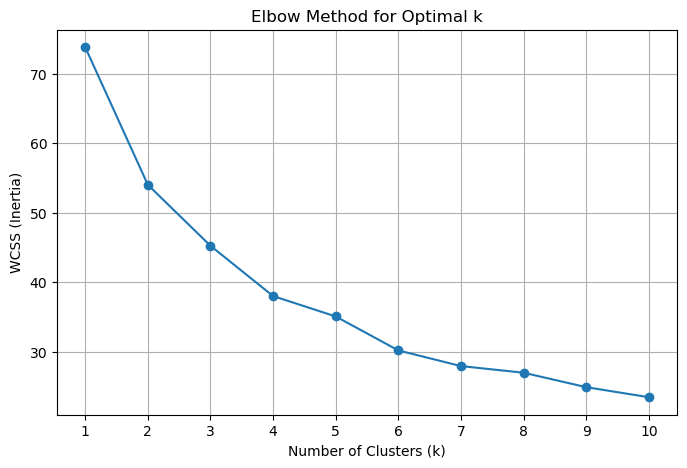

In [37]:
# Plot the Elbow Curve

plt.figure(figsize=(8, 5))

plt.plot(range(1, 11), wcss, marker='o')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.xticks(range(1, 11))
plt.ylabel('WCSS (Inertia)')
plt.grid(True)

plt.savefig("task_5_elbow_plot.png")
plt.show()


**Analysis:**

- Optimum value: **`k=4`**
- Graph starts to flatten after k=4


## Task 6: Apply Silhouette Analysis to find the optimal k value


In [38]:
# Import additional libraries
from sklearn.metrics import silhouette_score

In [39]:
# Setup data
X2 = df_cleaned_scaled.iloc[:,1:]
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     198 non-null    float64
 1   Annual Income (k$)      198 non-null    float64
 2   Spending Score (1-100)  198 non-null    float64
 3   Purchase Frequency      198 non-null    float64
 4   Avg Purchase Value      198 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [40]:
# Silhouette Method

sse = []

for k in range(2,11):
    km = KMeans(n_clusters = k, random_state=0)
    km.fit(X2)
    sse.append([k,silhouette_score(X2, km.labels_)])

sse

C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

[[2, 0.24322451129175346],
 [3, 0.21891543429938057],
 [4, 0.23354400177702006],
 [5, 0.20636687453835126],
 [6, 0.2325959619539697],
 [7, 0.21914586277124568],
 [8, 0.21127026579915778],
 [9, 0.21738050473108453],
 [10, 0.20564534287856012]]

In [41]:
df_sse = pd.DataFrame(sse)
df_sse

,0,1
0,2,0.243225
1,3,0.218915
2,4,0.233544
3,5,0.206367
4,6,0.232596
5,7,0.219146
6,8,0.211270
7,9,0.217381
8,10,0.205645


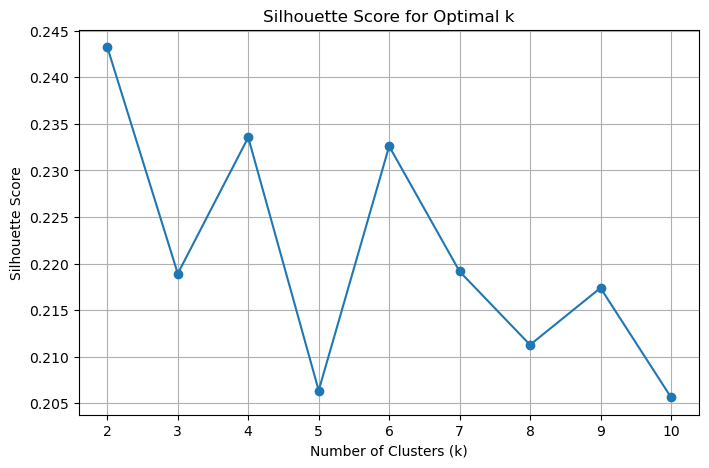

In [42]:
# Plot the Silhouette Curve

plt.figure(figsize=(8, 5))

plt.plot(df_sse[0], 
         df_sse[1], 
         marker='o')

plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

#plt.xticks(range(1, 11))

plt.grid(True)

plt.savefig("task_6_silhouette_plot.png")
plt.show()

**Analysis:**

- Optimum value: **`k=4`**
- The highest peak is when k=4


## Task 7: Train the K-means model and visualise the clusters


In [45]:
# Prepare the data
X_final = df_cleaned_scaled.iloc[:, 1:]

# Do KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_final)

# Add the cluster labels to the dataframe
df_cleaned_scaled['Cluster'] = cluster_labels

df_cleaned_scaled.head()

C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value,Cluster
0,1,0.745098,0.663462,0.716215,0.563830,0.867614,0
1,2,1.000000,0.682692,0.378611,0.574468,0.476427,0
2,3,0.549020,0.250000,0.383510,0.734043,0.180246,3
3,4,0.274510,0.076923,0.090930,0.117021,0.514826,1
4,5,0.823529,0.586538,0.559094,0.244681,0.566274,0


In [74]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X_final.columns)
centroids_df

,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Avg Purchase Value,Cluster
0,0.824930,0.680861,0.597067,0.423759,0.454172,-1.332268e-15
1,0.431723,0.333791,0.288682,0.205547,0.205272,3.000000e+00
2,0.288235,0.801346,0.700137,0.648936,0.397814,2.000000e+00
3,0.509412,0.229038,0.467858,0.760851,0.142633,1.000000e+00


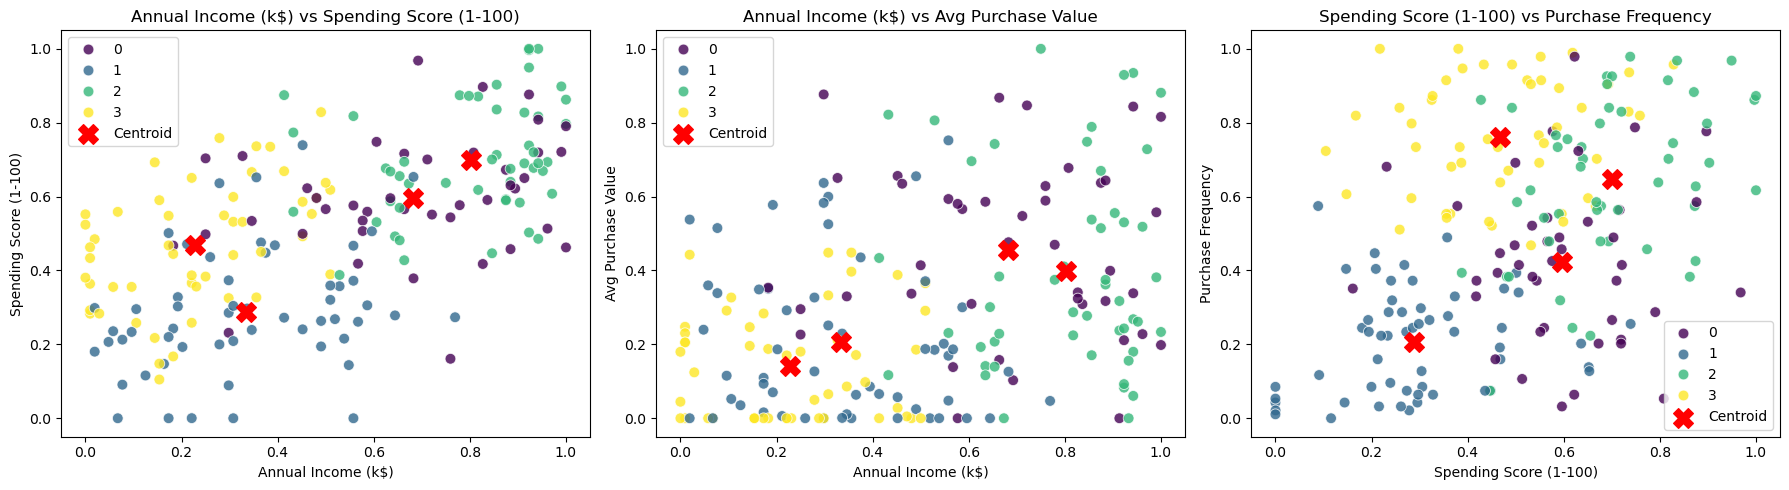

In [79]:
# 2D Plot: Annual Income (k$), Spending Score (1-100), Avg Purchase Value
# -----------------------------------------------------------------------

# Feature pairs to plot
pairs = [
    ('Annual Income (k$)', 'Spending Score (1-100)'),
    ('Annual Income (k$)', 'Avg Purchase Value'),
    ('Spending Score (1-100)', 'Purchase Frequency')
]

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each pair
for i, (x_feature, y_feature) in enumerate(pairs):
    ax = axes[i]
    
    # Seaborn scatterplot for cluster points
    sns.scatterplot(
        data=df_cleaned_scaled,
        x=x_feature,
        y=y_feature,
        hue='Cluster',
        palette='viridis',
        s=60,
        ax=ax,
        edgecolor='w',
        alpha=0.8
    )
    
    # Matplotlib scatterplot for centroids (black X markers)
    ax.scatter(
        centroids_df[x_feature],
        centroids_df[y_feature],
        color='red',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    ax.set_title(f'{x_feature} vs {y_feature}')
    ax.legend(loc='best')

plt.tight_layout()
plt.savefig("task_7a_2d_scatter_plot_all_3.png")
plt.show()

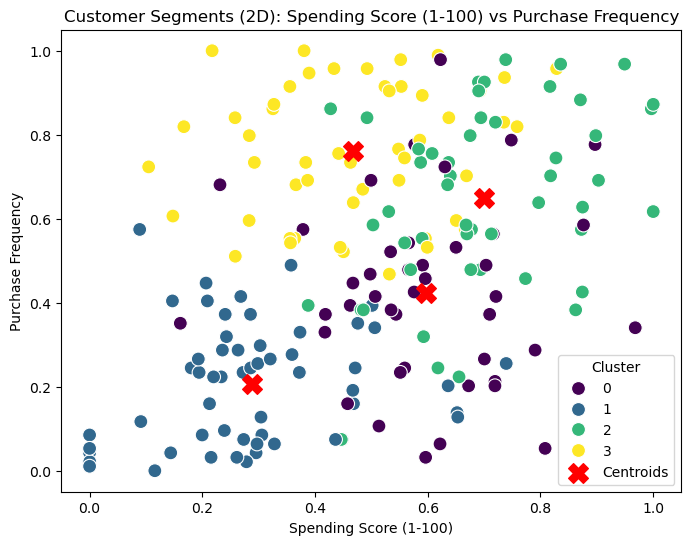

In [78]:
# 2D plot: Spending Score (1-100) vs Purchase Frequency
# -----------------------------------------------------

plt.figure(figsize=(8, 6))

# 2D Scatter Plot
sns.scatterplot(
    data=df_cleaned_scaled,
    x='Spending Score (1-100)',
    y='Purchase Frequency',
    hue='Cluster',
    palette='viridis',
    s=100
)

# Centroids
plt.scatter(
    centroids[:, df_cleaned_scaled.columns.get_loc('Spending Score (1-100)') - 1],
    centroids[:, df_cleaned_scaled.columns.get_loc('Purchase Frequency') - 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments (2D): Spending Score (1-100) vs Purchase Frequency')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')

plt.savefig("task_7b_2d_scatter_plot.png")
plt.show()

In [70]:
# Import additional libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

C:\Users\Alkaff\AppData\Local\Temp\ipykernel_17264\2149822035.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_17264\2149822035.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_17264\2149822035.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you inten

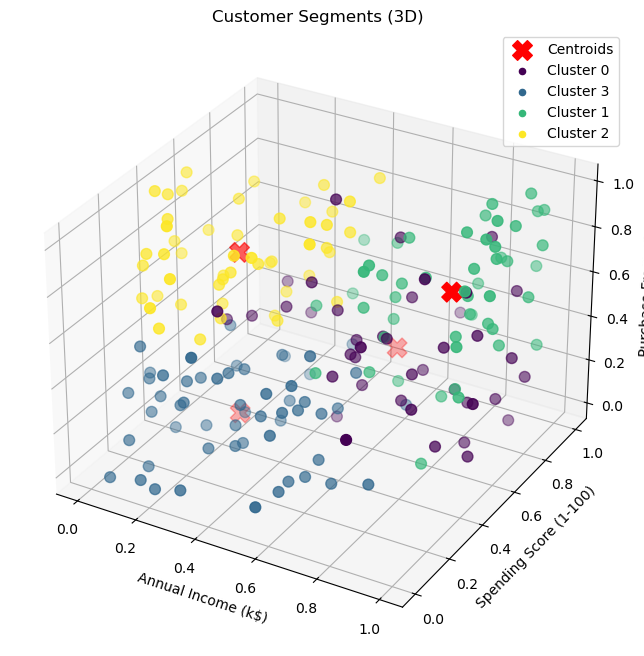

In [81]:
# 3D plot: Annual Income, Spending Score, Purchase Frequency
# ----------------------------------------------------------

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get 4 discrete colors
viridis = cm.get_cmap('viridis', 4)
colors = viridis(np.linspace(0, 1, 4))
cmap = ListedColormap(colors)

# 3D Scatter Plot
scatter = ax.scatter(
    df_cleaned_scaled['Annual Income (k$)'],
    df_cleaned_scaled['Spending Score (1-100)'],
    df_cleaned_scaled['Purchase Frequency'],
    c=df_cleaned_scaled['Cluster'],
    cmap=cmap,
    s=60
)

# Centroids
ax.scatter(
    centroids[:, df_cleaned_scaled.columns.get_loc('Annual Income (k$)') - 1],
    centroids[:, df_cleaned_scaled.columns.get_loc('Spending Score (1-100)') - 1],
    centroids[:, df_cleaned_scaled.columns.get_loc('Purchase Frequency') - 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

ax.set_title('Customer Segments (3D)')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Purchase Frequency')
#plt.colorbar(scatter, label='Cluster')

# Get the 4 distinct colours
viridis = cm.get_cmap('viridis', 4)
colors = viridis(np.linspace(0, 1, 4))

# Create legend manually so it wont appear as continouos bar
cluster_labels = df_cleaned_scaled['Cluster'].unique()
for i, cluster in enumerate(cluster_labels):
    ax.scatter([], [], [], c=colors[i], label=f'Cluster {cluster}')
ax.legend(loc='upper right')

plt.savefig("task_7c_3d_scatter_plot.png")
plt.show()

**Analysis:**

- Plotted the 3 combination of pairs for: Annual Income, Spending Score (1-100), Purchase Frequency
- Spending Score (1-100) vs Purchase Frequency showed the best distinctions in the clusters
- The 4 clusters could represent
   - Cluster 0 (purple): High Spending Score, Medium Purchase Frequency
   - Cluster 1 (blue): Low Spending Score, Low Purchase Frequency
   - Cluster 2 (green): High Spending Score, High Purchase Frequency
   - Cluster 3 (yellow): Medium Spending Score, High Purchase Frequency
- Plotted the 3D scatter plot for Annual Income, Spending Score (1-100), Purchase Frequency
- The 3D plot also agrees with the 2D plots interpretations
